## Task 1

In [1015]:
import math
import pickle
import numpy as np
import matplotlib.pyplot as plt

def unpickle(path):
    with open(path, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [1016]:
#b'batch_label', b'labels', b'data', b'filenames'
#initialize data
data_path = './data/cifar-10-batches-py/data_batch_1'
test_data_path = './data/cifar-10-batches-py/test_batch'
metadata_path = './data/cifar-10-batches-py/batches.meta'
cifar10 = unpickle(data_path)
test_cifar10 = unpickle(test_data_path)
metadata = unpickle(metadata_path)
classes = {'auto': 1, 'deer':4, 'ship': 8}
n = 30
n_test = 10
labels = np.array(cifar10[b'labels'])
data = np.array(cifar10[b'data'], dtype=np.float32)
test_labels = np.array(test_cifar10[b'labels'])
test_data = np.array(test_cifar10[b'data'], dtype=np.float32)

In [1017]:
#extracts count number of images from a certain clazz given a source
def read_class(clazz, source, source_labels, count):
    result = []
    accu = 0
    for idx, item in enumerate(source_labels):
        if accu >= count: break
        if item == clazz:
            result.append(source[idx])
            accu += 1
    return np.array(result, dtype=np.float32)

In [1018]:
#load color data
auto_data = read_class(classes['auto'], data, labels, n)
deer_data = read_class(classes['deer'], data, labels, n)
ship_data = read_class(classes['ship'], data, labels, n)
#load color test data
auto_test_data = read_class(classes['auto'], test_data, test_labels, n_test)
deer_test_data = read_class(classes['deer'], test_data, test_labels, n_test)
ship_test_data = read_class(classes['ship'], test_data, test_labels, n_test)

In [1019]:
#get grayscale data
gray_auto_data = np.floor_divide(auto_data.reshape(n, 3, 1024).sum(axis=1), 3)
gray_deer_data = np.floor_divide(deer_data.reshape(n, 3, 1024).sum(axis=1), 3)
gray_ship_data = np.floor_divide(ship_data.reshape(n, 3, 1024).sum(axis=1), 3)

gray_auto_test_data = np.floor_divide(auto_test_data.reshape(n_test, 3, 1024).sum(axis=1), 3)
gray_deer_test_data = np.floor_divide(deer_test_data.reshape(n_test, 3, 1024).sum(axis=1), 3)
gray_ship_test_data = np.floor_divide(ship_test_data.reshape(n_test, 3, 1024).sum(axis=1), 3)

(32, 32, 3)


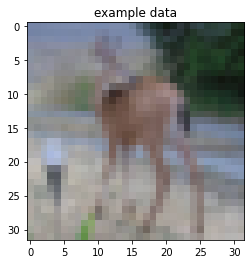

In [1020]:
#verify color images
def cifar10_plot(im):
    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b)).astype(np.int32)

    print(img.shape)
    plt.imshow(img)
    plt.title("example data")
    plt.show()

cifar10_plot(deer_test_data[7])

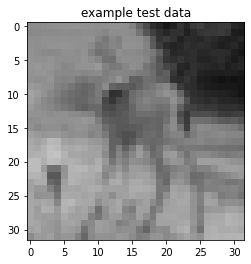

In [1021]:
#verify gray scale images
plt.title("example test data")
plt.imshow(gray_deer_test_data[7].reshape(32, 32), cmap='gray', vmin=0, vmax=255)

In [1022]:
class HistClassifier:
    def __init__(self):
        self.auto_hist = None
        self.deer_hist = None
        self.ship_hist = None

        self.auto_test_hist = None
        self.deer_test_hist = None
        self.ship_test_hist = None

    def create_hists(self, n_bins):
        self.auto_hist = np.array([np.histogram(data, bins=n_bins)[0] for data in gray_auto_data])
        self.deer_hist = np.array([np.histogram(data, bins=n_bins)[0] for data in gray_deer_data])
        self.ship_hist = np.array([np.histogram(data, bins=n_bins)[0] for data in gray_ship_data])

        self.auto_test_hist = np.array([np.histogram(data, bins=n_bins)[0] for data in gray_auto_test_data])
        self.deer_test_hist = np.array([np.histogram(data, bins=n_bins)[0] for data in gray_deer_test_data])
        self.ship_test_hist = np.array([np.histogram(data, bins=n_bins)[0] for data in gray_ship_test_data])

    def classify(self, img_hist):
        auto_dist = [np.linalg.norm((img_hist - cur_hist)) for cur_hist in self.auto_hist]
        auto_dist_min = np.min(auto_dist)
        deer_dist = [np.linalg.norm((img_hist - cur_hist)) for cur_hist in self.deer_hist]
        deer_dist_min = np.min(deer_dist)
        ship_dist = [np.linalg.norm((img_hist - cur_hist)) for cur_hist in self.ship_hist]
        ship_dist_min = np.min(ship_dist)
        overall_min = min(auto_dist_min, deer_dist_min, ship_dist_min)
        if overall_min == auto_dist_min:
            return 'auto'
        elif overall_min == deer_dist_min:
            return 'deer'
        else:
            return 'ship'


In [1023]:
def run(n_bins):
    accu_auto = 0
    accu_deer = 0
    accu_ship = 0
    classifier = HistClassifier()
    classifier.create_hists(n_bins)

    for img_hist in classifier.auto_test_hist:
        if classifier.classify(img_hist) == 'auto':
            accu_auto += 1
    for img_hist in classifier.deer_test_hist:
        if classifier.classify(img_hist) == 'deer':
            accu_deer += 1
    for img_hist in classifier.ship_test_hist:
        if classifier.classify(img_hist) == 'ship':
            accu_ship += 1

    print(f'running with {n_bins} bins...')
    print(f'auto accuracy: {(accu_auto/n_test)*100}%')
    print(f'deer accuracy: {(accu_deer/n_test)*100}%')
    print(f'ship accuracy: {(accu_ship/n_test)*100}%')
    print('overall accuracy is: ', ((accu_auto + accu_deer + accu_ship) / (n_test*3))*100,'%')

In [1024]:
run(n_bins=51)

running with 51 bins...
auto accuracy: 60.0%
deer accuracy: 50.0%
ship accuracy: 30.0%
overall accuracy is:  46.666666666666664 %


In [1025]:
run(n_bins=2)

running with 2 bins...
auto accuracy: 40.0%
deer accuracy: 40.0%
ship accuracy: 50.0%
overall accuracy is:  43.333333333333336 %


In [1026]:
run(n_bins=10)

running with 10 bins...
auto accuracy: 50.0%
deer accuracy: 60.0%
ship accuracy: 50.0%
overall accuracy is:  53.333333333333336 %


In [1027]:
run(n_bins=30)

running with 30 bins...
auto accuracy: 50.0%
deer accuracy: 50.0%
ship accuracy: 30.0%
overall accuracy is:  43.333333333333336 %


In [1028]:
run(n_bins=40)

running with 40 bins...
auto accuracy: 50.0%
deer accuracy: 60.0%
ship accuracy: 30.0%
overall accuracy is:  46.666666666666664 %


In [1029]:
run(n_bins=100)

running with 100 bins...
auto accuracy: 50.0%
deer accuracy: 40.0%
ship accuracy: 30.0%
overall accuracy is:  40.0 %


In [1030]:
run(n_bins=255)

running with 255 bins...
auto accuracy: 70.0%
deer accuracy: 30.0%
ship accuracy: 10.0%
overall accuracy is:  36.666666666666664 %


## Task 2

In [1031]:
import skimage
from skimage.color import rgba2rgb
from skimage.color import rgb2gray
from skimage.transform import integrate

image_path = './data/visual_attention_ds.png'

image = skimage.io.imread(fname=image_path)
rgb = rgba2rgb(image)
grayscale = rgb2gray(rgb)
integral_img = skimage.transform.integral_image(grayscale)

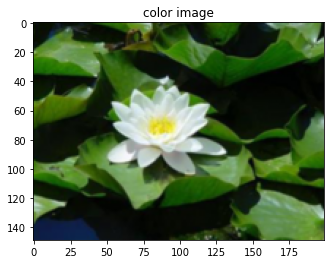

In [1032]:
plt.title("color image")
plt.imshow(rgb)

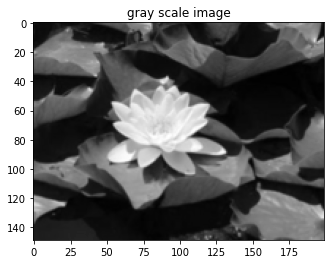

In [1033]:
plt.title("gray scale image")
plt.imshow(grayscale, cmap='gray')

In [1034]:
class ContrastImage():
    def __init__(self, surround_dim, center_dim):
        self.surround_dim = surround_dim
        self.center_dim = center_dim

    def create(self):
        contrast_image = np.zeros_like(grayscale)
        center_size = np.array([self.center_dim]*2)
        surround_size = np.array([self.surround_dim]*2)
        half_surround = np.floor_divide(surround_size[0], 2)
        half_center = np.floor_divide(center_size[0], 2)
        #initialize pixel coordinates
        init_coor = np.array([half_surround]*2)

        for x in range(init_coor[0], (grayscale.shape[0] - half_surround)):
            for y in range(init_coor[1], (grayscale.shape[1] - half_surround)):
                cur_coor = np.array([x, y])
                surround_sum = integrate(integral_img, (cur_coor - half_surround), (cur_coor + half_surround))
                center_sum = integrate(integral_img, (cur_coor - half_center), (cur_coor + half_center))
                contrast = surround_sum - center_sum
                contrast_image[cur_coor[0], cur_coor[1]] = contrast
        return contrast_image

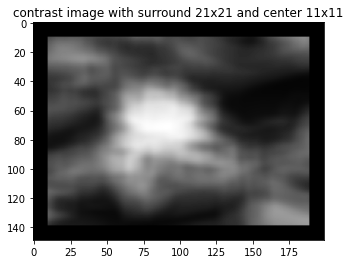

In [1035]:
contrast_image = ContrastImage(surround_dim=21, center_dim=11)
plt.title("contrast image with surround 21x21 and center 11x11")
plt.imshow(contrast_image.create(), cmap='gray')

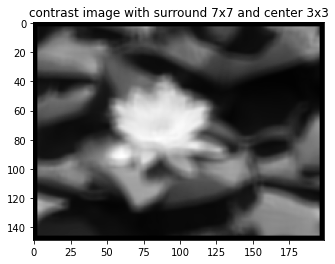

In [1036]:
contrast_image = ContrastImage(surround_dim=7, center_dim=3)
plt.title("contrast image with surround 7x7 and center 3x3")
plt.imshow(contrast_image.create(), cmap='gray')

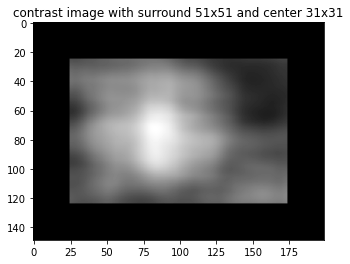

In [1037]:
contrast_image = ContrastImage(surround_dim=51, center_dim=31)
plt.title("contrast image with surround 51x51 and center 31x31")
plt.imshow(contrast_image.create(), cmap='gray')

In the contrast maps we can observe that as we increase the surround and center window sizes the resulting contrast image gets blurry, reducing the window sizes has the opposite effect, this affects how much detail can be appreciated. This makes sense, since the resulting value of each contrast image pixel
depends on the pixels from the original image considered in each window, when the windows are bigger the pixels in the resulting contrast image have higher correlation between themselves due to greater overlap in the input.

We can also note that by increasing the window size black borders with thickness proportional to the window size get formed.
This is because those areas cannot be considered in the surround-center contrast map, only pixels at the center of the surround window when sliding
it over the image can be considered.